In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, auc, roc_curve, precision_score, recall_score

%matplotlib inline

In [2]:
# Loading  Data
os.chdir(r'C:\Users\alanw\OneDrive\Varsity\Research\Experiments\dissertation')
df = pd.read_csv('UCI_Credit_Card_balanced.csv')

In [3]:
# Scale data
scaler = StandardScaler()
scaler.fit(df.drop('Y',axis=1))
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [4]:
# Split features from response variables
X = pd.DataFrame(scaled_features,columns=df.columns[:-1]).values
y = df['Y'].values

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [5]:
# create model
model = Sequential()
    
# hidden layer
model.add(Dense(12, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())

# output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [6]:
# Define early stopping
es = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)

In [7]:
# Fit the model
t0 = datetime.now()
model.fit(X_train, 
            y_train, 
            epochs=200,
            batch_size=500,
            validation_data=(X_test, y_test),
            callbacks=es,
            verbose=0)
t1 = datetime.now()
print("Training Time: ", (t1 - t0))

Training Time:  0:00:27.716647


In [8]:
losses = pd.DataFrame(model.history.history)

<Figure size 720x504 with 0 Axes>

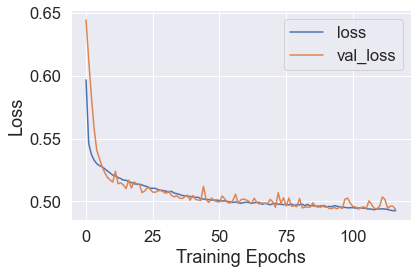

In [19]:
# Plot Training and validation losses during training
plt.figure(figsize=(10, 7))
losses[['loss','val_loss']].plot()
plt.xlabel('Training Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

font = {'size'   : 13}
plt.rc('font', **font)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\ann_validation_loss.png')
plt.show()

<Figure size 720x504 with 0 Axes>

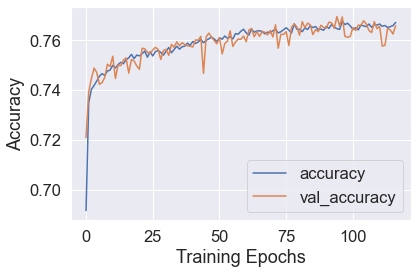

In [20]:
# Plot Training and validation accuracy during training
plt.figure(figsize=(10, 7))
losses[['accuracy','val_accuracy']].plot()
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

font = {'size'   : 13}
plt.rc('font', **font)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\ann_validation_accuracy.png')
plt.show()

In [11]:
# Apply model to test data
y_pred = model.predict_classes(X_test)

C:\Users\alanw\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 76.95%


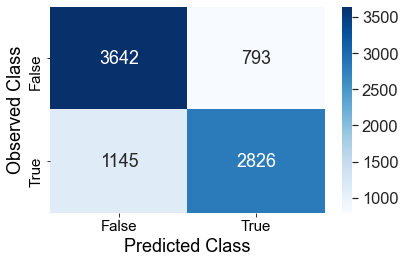

In [13]:
# Plot Confusion metric
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

label_font = {'size':'18'}
ax.set_xlabel('Predicted Class', fontdict=label_font);
ax.set_ylabel('Observed Class', fontdict=label_font);

ax.tick_params(axis='both', which='major', labelsize=15)
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['False', 'True']);

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\ann_conf.png')

plt.show()

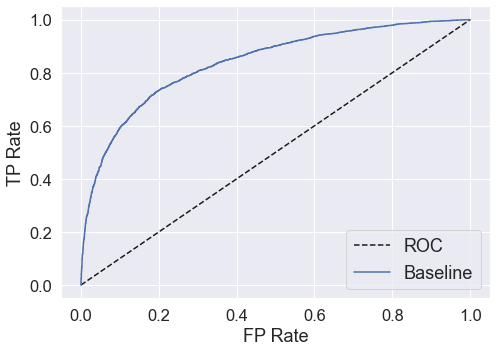

In [18]:
# Plot ROC Curve
plt.figure(figsize=(7, 5))

predictions = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predictions)

auc_keras = auc(fpr_keras, tpr_keras)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN (AUC = {:.3f})'.format(auc_keras))
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.legend(["ROC", "Baseline"], fontsize=18, loc="best")

font = {'size'   : 10}
plt.rc('font', **font)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\ann_roc.png')
plt.show()

In [15]:
# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa: %.2f" % (kappa))

Cohen's Kappa: 0.54
